In [1]:
import pandas as pd
import numpy as np

In [2]:
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

In [3]:
pop.shape

(2544, 4)

In [4]:
areas.shape

(52, 2)

In [5]:
abbrevs.shape

(51, 2)

In [6]:
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [7]:
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [8]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [9]:
merged = pd.merge(pop, abbrevs, how = "outer", left_on = "state/region", right_on = "abbreviation").drop("abbreviation", axis = 1)

In [10]:
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [11]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [12]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [13]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [14]:
merged.loc[merged['state/region'] == 'USA'].count()

state/region    48
ages            48
year            48
population      48
state            0
dtype: int64

In [15]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'

In [16]:
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'

In [17]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [18]:
final = pd.merge(merged, areas, on = 'state', how = 'left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [19]:
final.isnull().sum()

state/region      0
ages              0
year              0
population       20
state             0
area (sq. mi)    48
dtype: int64

In [20]:
final['state'].loc[final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [21]:
final.loc[final['area (sq. mi)'].isnull(), 'state'].unique()

array(['United States'], dtype=object)

In [22]:
final.dropna(inplace = True)
final.isnull().sum()

state/region     0
ages             0
year             0
population       0
state            0
area (sq. mi)    0
dtype: int64

In [23]:
data2010 = final.query("year == 2010 & ages =='total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [24]:
data2010_bis = final.loc[(final['year'] == 2010) & (final['ages'] == 'total')] 
data2010_bis.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [25]:
print(data2010.shape)
print(data2010_bis.shape)

(52, 6)
(52, 6)


In [26]:
data2010.set_index('state', inplace = True)
data2010.head()

,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423.0
Alaska,AK,total,2010,713868.0,656425.0
Arizona,AZ,total,2010,6408790.0,114006.0
Arkansas,AR,total,2010,2922280.0,53182.0
California,CA,total,2010,37333601.0,163707.0


In [27]:
density = data2010['population'] / data2010['area (sq. mi)']
density.head()

state
Alabama        91.287603
Alaska          1.087509
Arizona        56.214497
Arkansas       54.948667
California    228.051342
dtype: float64

In [28]:
density.sort_values(ascending = False, inplace = True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [29]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

In [30]:
californiatotal = merged.loc[(merged['state'] == 'California') & (merged['ages'] == 'total')]

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='year', ylabel='population'>

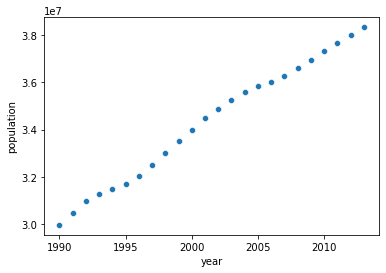

In [32]:
sns.scatterplot(x = californiatotal.year, y = californiatotal.population)